In [15]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import AutoDateLocator
import matplotlib.dates as mdates
from dateutil.tz import gettz
import numpy as np


In [16]:
filename='npa1_5min_climate_data.csv.gz'
npa1_climdata = pd.read_csv(filename)

In [17]:
npa1_climdata.head()

,DateTime,P_hpa,T_C,rh,rh_1day_rolling_average,P_hpa_1day_rolling_average,T_C_1day_rolling_average
0,2023-05-12 00:00:00+00:00,1013.1,24.8,27.9,27.9,1013.100,24.80
1,2023-05-12 00:05:00+00:00,1013.1,24.8,27.9,27.9,1013.100,24.80
2,2023-05-12 00:10:00+00:00,1013.1,24.8,27.9,27.9,1013.100,24.80
3,2023-05-12 00:15:00+00:00,1013.0,24.8,27.9,27.9,1013.075,24.80
4,2023-05-12 00:20:00+00:00,1013.0,24.9,27.9,27.9,1013.060,24.82


In [18]:
npa1_climdata['DateTime']

0        2023-05-12 00:00:00+00:00
1        2023-05-12 00:05:00+00:00
2        2023-05-12 00:10:00+00:00
3        2023-05-12 00:15:00+00:00
4        2023-05-12 00:20:00+00:00
                   ...            
58682    2024-01-29 18:35:00+00:00
58683    2024-01-29 18:40:00+00:00
58684    2024-01-29 18:45:00+00:00
58685    2024-01-29 18:50:00+00:00
58686    2024-01-29 18:55:00+00:00
Name: DateTime, Length: 58687, dtype: object

In [19]:
npa1_climdata['DateTime'] = pd.to_datetime(npa1_climdata.DateTime)

In [23]:
npa1_climdata['DateTime']

0       2023-05-12 00:00:00+00:00
1       2023-05-12 00:05:00+00:00
2       2023-05-12 00:10:00+00:00
3       2023-05-12 00:15:00+00:00
4       2023-05-12 00:20:00+00:00
                   ...           
58682   2024-01-29 18:35:00+00:00
58683   2024-01-29 18:40:00+00:00
58684   2024-01-29 18:45:00+00:00
58685   2024-01-29 18:50:00+00:00
58686   2024-01-29 18:55:00+00:00
Name: DateTime, Length: 58687, dtype: datetime64[ns, UTC]

In [24]:
npa1_climdata.set_index('DateTime', inplace=True)

In [25]:
npa1_climdata.head()

,P_hpa,T_C,rh,rh_1day_rolling_average,P_hpa_1day_rolling_average,T_C_1day_rolling_average
DateTime,,,,,,
2023-05-12 00:00:00+00:00,1013.1,24.8,27.9,27.9,1013.100,24.80
2023-05-12 00:05:00+00:00,1013.1,24.8,27.9,27.9,1013.100,24.80
2023-05-12 00:10:00+00:00,1013.1,24.8,27.9,27.9,1013.100,24.80
2023-05-12 00:15:00+00:00,1013.0,24.8,27.9,27.9,1013.075,24.80
2023-05-12 00:20:00+00:00,1013.0,24.9,27.9,27.9,1013.060,24.82


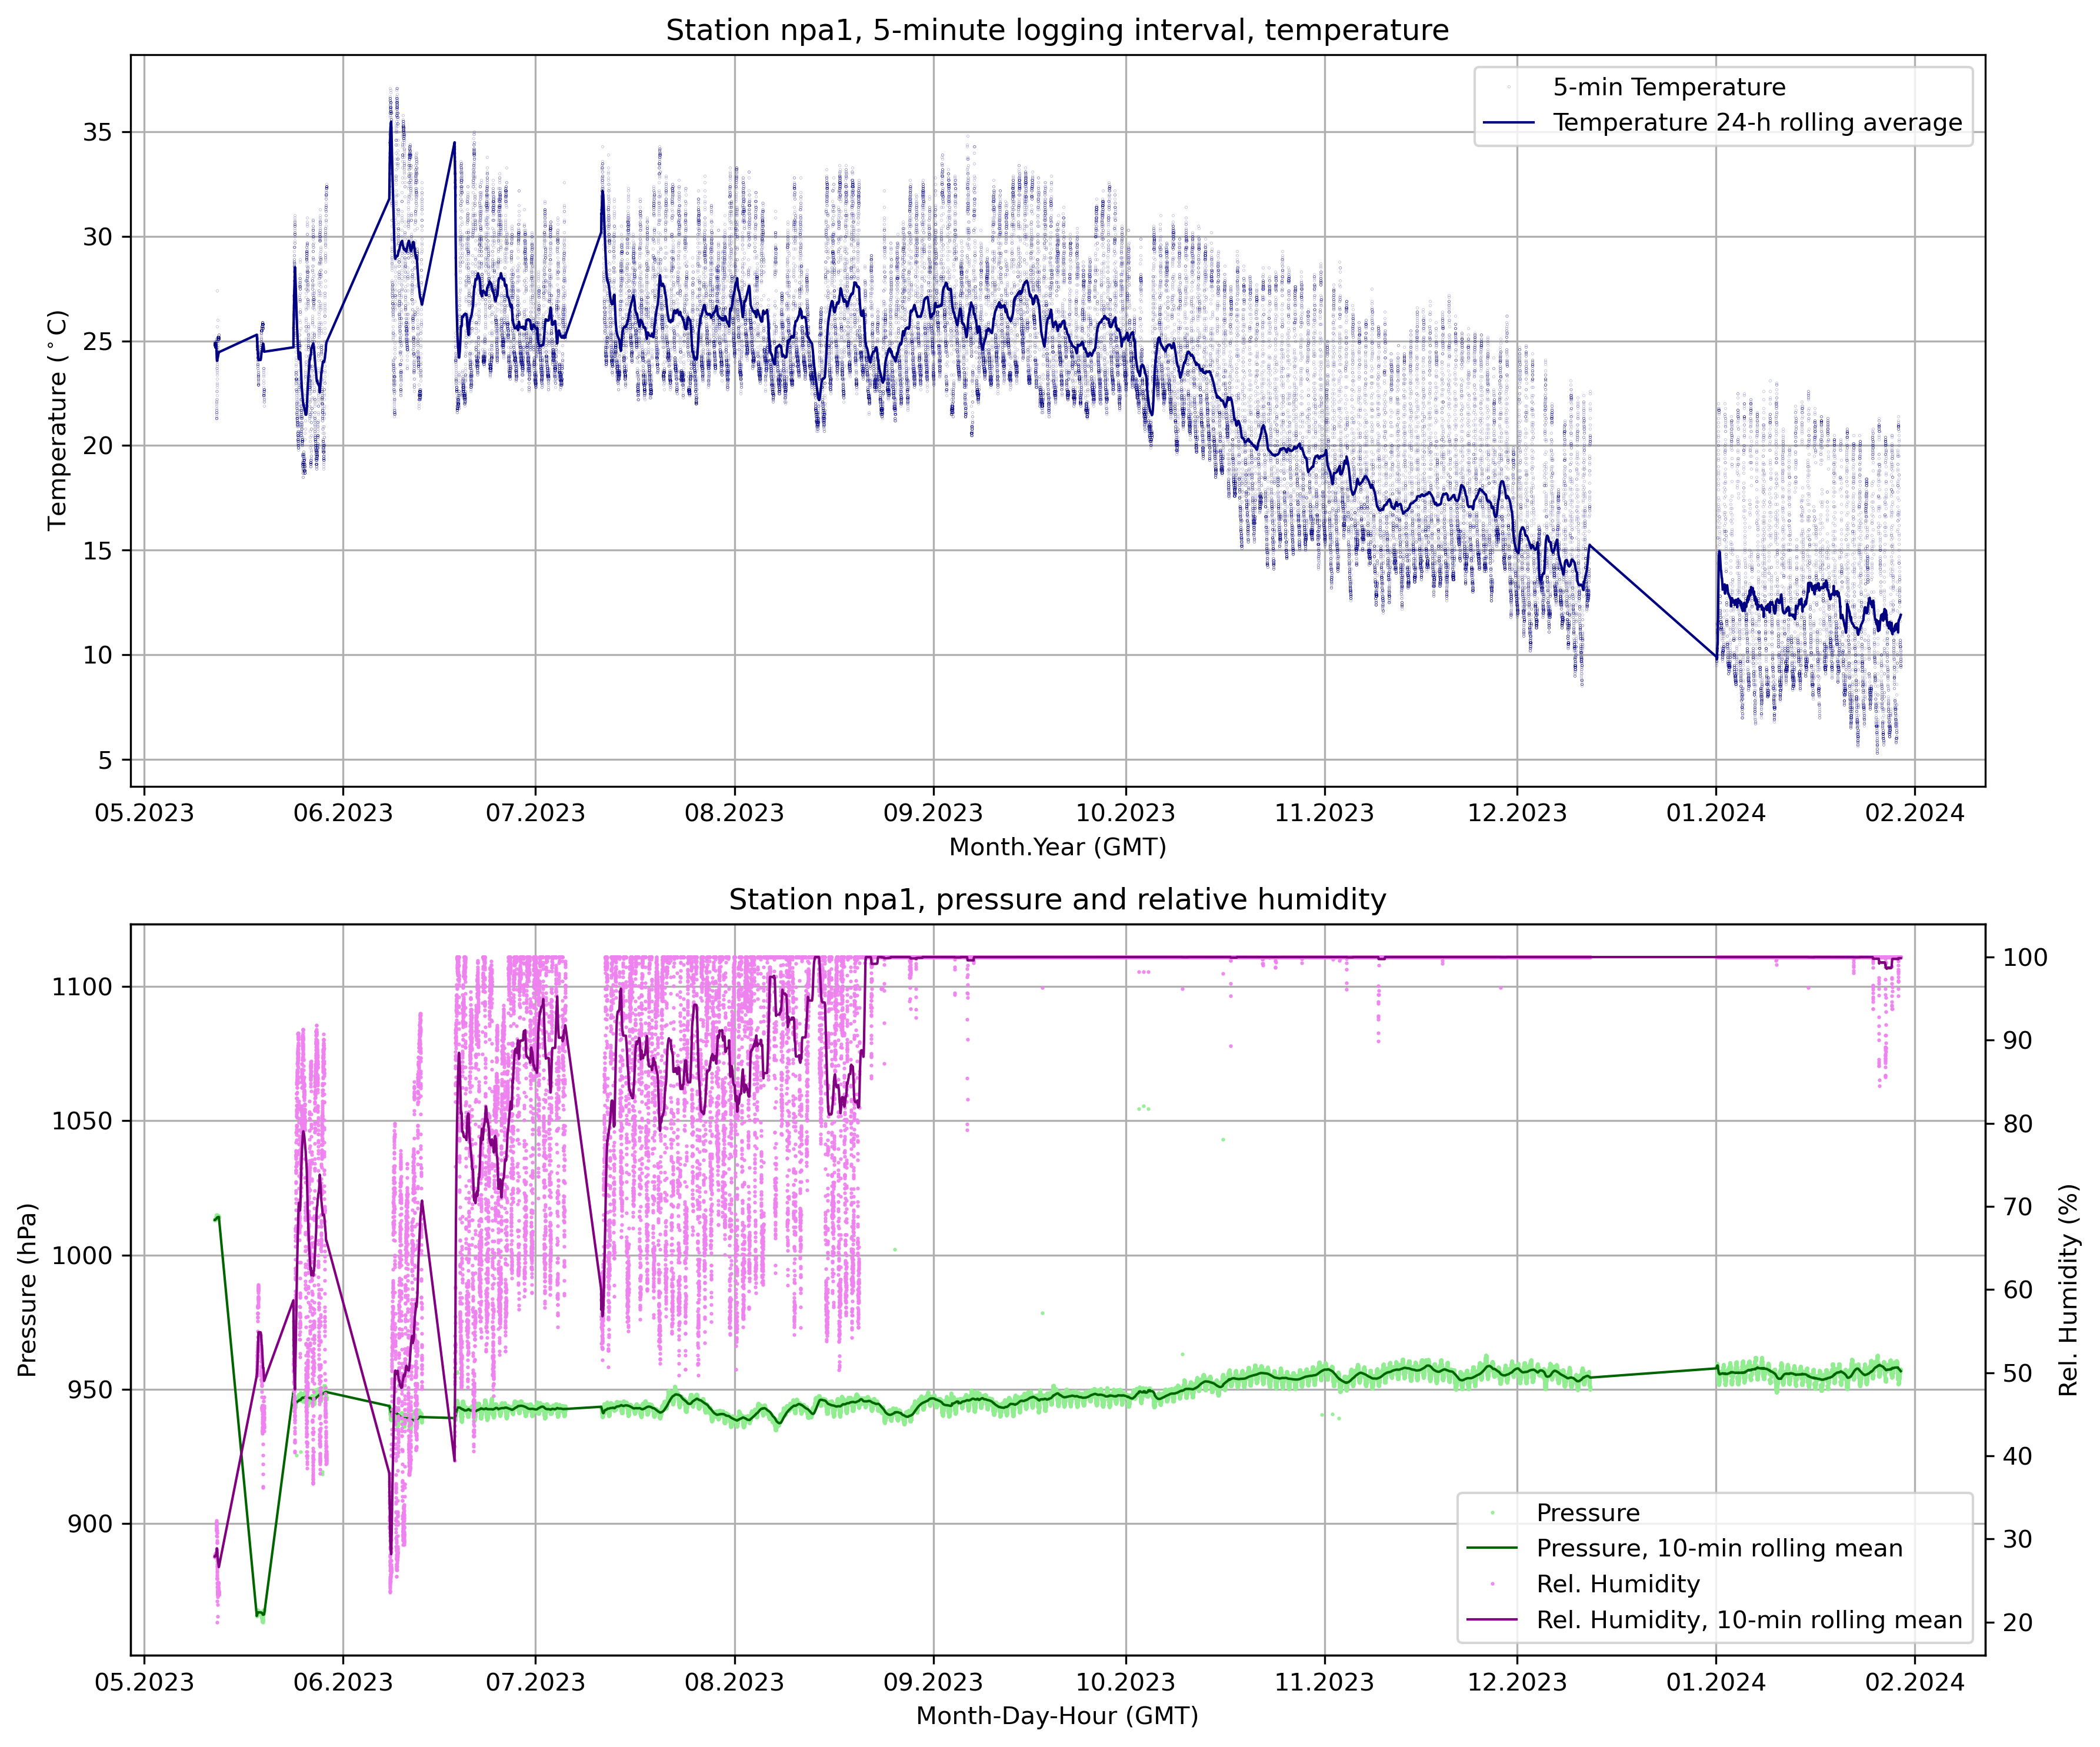

In [26]:
station_name = 'npa1'
df = npa1_climdata

fg, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10), dpi=300)
ax[0].plot(df.index, df['T_C'], linestyle='', marker='o', ms=0.05, lw=1, color='navy', label='5-min Temperature')
ax[0].plot(df.index, df['T_C_1day_rolling_average'], marker='', ms=1, lw=1, linestyle='-', color='navy', label='Temperature 24-h rolling average')
ax[0].grid()
ax[0].set_xlabel('Month.Year (GMT)')
ax[0].set_ylabel('Temperature ($^\circ$C)')
ax[0].legend()
#date_form = DateFormatter("%b-%d")
date_form = DateFormatter('%m.%Y')
#date_form.set_tzinfo(gettz('Asia/Kolkata'));
date_form.set_tzinfo(gettz('GMT'));
ax[0].xaxis.set_major_formatter(date_form)
# ax[0].xaxis.set_major_locator(mdates.AutoDateLocator())# MonthLocator(interval=1))
ax[0].set_title('Station %s, 5-minute logging interval, temperature'%station_name)

ax1b = ax[1].twinx()
lns1 = ax[1].plot(df.index, df['P_hpa'], linestyle='', marker='o', ms=0.5, lw=1, color='lightgreen', label='Pressure')
lns2 = ax1b.plot(df.index, df['rh'], linestyle='', lw=1, marker='o', ms=0.5, color='violet', label='Rel. Humidity')
ax1b.plot(df.index, df['rh_1day_rolling_average'], marker='', ms=1, linestyle='-', lw=1, color='purple', label='Rel. Humidity, 10-min rolling mean')
ax[1].plot(df.index, df['P_hpa_1day_rolling_average'], marker='', ms=1, linestyle='-', lw=1, color='darkgreen', label='Pressure, 10-min rolling mean')
ax[1].grid()
ax[1].set_xlabel('Month-Day-Hour (GMT)')
ax[1].set_ylabel('Pressure (hPa)')
ax1b.set_ylabel('Rel. Humidity (%)')
lines, labels = ax[1].get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()
ax1b.legend(lines + lines2, labels + labels2, loc=0)
ax[1].xaxis.set_major_formatter(date_form)
# ax[1].xaxis.set_major_locator(mdates.AutoDateLocator()) #MonthLocator(interval=1))
ax[1].set_title('Station %s, pressure and relative humidity'%station_name)
fg.tight_layout()
#fg.savefig('%s_TempP.png'%station_name, dpi=300)
